## Lexical inferencing strategies' use by German L3 learners in Spain
# Analysis of actual strategy use

#### CONTENT

Preparation

Analysis:

~ Strategy use during the whole think-aloud task:

* Group results
* Individual results


~ Detailed analysis of the strategy use related to the same nine words:

* Group results, including strategy use by words and analysis of inferencing success by strategies and words
* Individual results

### Preparation
#### Importing tools and data

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### First data set:

Codings, codes and results by participant for the nine words all the participants dealt with (exported from MAXQDA and compiled in one Excel file; column names and codes translated to English by the author)

In [2]:
raw_data = pd.read_excel('Daten/Codings_Tab_W_eng.xlsx')

In [3]:
raw_data.head()

,Word,TN,Codings,Codes,Result
0,kassierte,TN1,Seine Mutter kassierte (---) die Wer-be-[ver-v...,S3-11 (syntactic relations),T
1,kassierte,TN1,Seine Mutter kassierte (---) die Wer-be-[ver-v...,S3-12 (semantic relations),T
2,kassierte,TN1,Seine Mutter kassierte (---) die Wer-be-[ver-v...,S4-20 (world knowledge),T
3,kassierte,TN3,Werbegelder (-) a lo mejor (--) gelder (1.6) e...,S4-20 (world knowledge),F
4,kassierte,TN3,Werbegelder (-) a lo mejor (--) gelder (1.6) e...,S3-11 (syntactic relations),F


##### Second data set:

Results of a frequency analysis of all coded segments by participant (exported from MAXQDA and compiled in one Excel file; column names and codes translated to English by the author)

In [4]:
raw_data2 = pd.read_excel('Daten/Analysis_codedSegments_eng.xlsx')

In [5]:
raw_data2.head()

,TN,Codes,Abs_Numbers,Percentage
0,TN1,S1-6 (word formation rules),27,24.55
1,TN1,S3 (immediate context),17,15.45
2,TN1,S1-7 (partial meaning of complex words),14,12.73
3,TN1,S3-12 (semantic relations),12,10.91
4,TN1,S3-11 (syntactic relations),9,8.18


#### Choosing data for the analysis

In [6]:
data = raw_data.drop(columns=['Codings'])

In [7]:
data.loc[0]

Word                        kassierte
TN                                TN1
Codes     S3-11 (syntactic relations)
Result                              T
Name: 0, dtype: object

In [8]:
ind_leer = []
for j, i in enumerate(raw_data2['Percentage']):
    if i == 0:
        ind_leer.append(j)

In [9]:
data2 = raw_data2.drop(ind_leer).reset_index()

In [10]:
data2.shape

(141, 5)

#### Preparing the data sets for the analysis

To faciliate the analysis of strategy use by category, a new column is created ("strategy group" or "category").

In [11]:
data['Str_gr'] = 0

j=0
for i in data['Codes']:
    if 'S1-' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S1 (word level, intralingual)'
    elif 'S2-' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S2 (word level, interlingual)'
    elif 'S1/2' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S1/2 (word level)'
    elif 'S3-' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S3 (immediate context)'
    elif 'S3 ' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S3 (immediate context)'
    elif 'S4-' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S4 (wider context)'
    elif 'S3/4' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S3/4 (immediate or wider context)'
    elif 'S5' in str(data.loc[j,'Codes']):
        data.loc[j,'Str_gr'] = 'S5 (extralingual context)'
    j = j+1

In [12]:
data2['Str_gr'] = 0

j=0
for i in data2['Codes']:
    if 'S1-' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S1 (word level, intralingual)'
    elif 'S1 ' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S1 (word level, intralingual)'
    elif 'S2' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S2 (word level, interlingual)'
    elif 'S1/2' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S1/2 (word level)'
    elif 'S3-' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S3 (immediate context)'
    elif 'S3 ' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S3 (immediate context)'
    elif 'S4' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S4 (wider context)'
    elif 'S3/4' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S3/4 (immediate or wider context)'
    elif 'S5' in str(data2.loc[j,'Codes']):
        data2.loc[j,'Str_gr'] = 'S5 (extralingual context)'
    j = j+1

To control for repeated use of the same inferencing strategy for the same word, a new data set is created which does not contain duplicates.

In [13]:
data.shape

(257, 5)

In [14]:
data1 = data.drop_duplicates()

In [15]:
data1.shape

(206, 5)

#### Functions

In [16]:
def df_Strat(D):
    
    lst = []
    for el in D['Codes'].unique():
        lst.append(D[D['Codes']==el]['Abs_Numbers'].sum())
    
    ind_l = []
    for el in D['Codes'].unique():
        ind_l.append(el)
    
    df = pd.DataFrame(lst,index=ind_l,columns=['Abs_Numbers'])
    return df

In [17]:
def df_Strat_pr(D):
    
    lst = []
    for el in D['Codes'].unique():
        lst.append((D[D['Codes']==el]['Percentage'].sum())/7)
    
    ind_l = []
    for el in D['Codes'].unique():
        ind_l.append(el)
    
    df = pd.DataFrame(lst,index=ind_l,columns=['Percentage'])
    return df

In [18]:
def df_Stratgr(D):
    
    lst = []
    for el in D['Str_gr'].unique():
        lst.append(D[D['Str_gr']==el]['Abs_Numbers'].sum())
    
    ind_l = []
    for el in D['Str_gr'].unique():
        ind_l.append(el)
    
    df = pd.DataFrame(lst,index=ind_l,columns=['Abs_Numbers'])
    return df

In [19]:
def graf_pie(D,col):
    fig = D[col].value_counts().plot(kind = 'pie',
                                           figsize = (7,7),
                                           autopct='%.1f')#, startangle = -20)

    fig.set_ylabel("");

## Analysis

### Strategy use during the whole think-aloud task 


The analysis is based on the number of segments coded with the specific codes in MAXQDA.

#### Group results

In [20]:
len(data2['Codes'].unique())

31

In [21]:
df_Strat(data2).sort_values(by='Abs_Numbers', ascending=False)

,Abs_Numbers
S1-6 (word formation rules),145
S3-11 (syntactic relations),105
S3-12 (semantic relations),94
S1-7 (partial meaning of complex words),74
S3 (immediate context),73
S4-18 (thematic knowledge),35
S2-2 (L2 - English),35
S4-20 (world knowledge),29
S2-1 (L1 - Spanish),28
S1-9 (orthography),26


In [22]:
df_Strat_pr(data2).sort_values(by='Percentage', ascending=False)

,Percentage
S1-6 (word formation rules),18.555714
S3-11 (syntactic relations),12.872857
S3-12 (semantic relations),11.767143
S3 (immediate context),9.841429
S1-7 (partial meaning of complex words),9.798571
S4-18 (thematic knowledge),4.208571
S2-2 (L2 - English),4.168571
S4-20 (world knowledge),3.881429
S1-9 (orthography),3.768571
S2-1 (L1 - Spanish),3.322857


In [23]:
df_Stratgr(data2).sort_values(by='Abs_Numbers', ascending=False)

,Abs_Numbers
S3 (immediate context),305
"S1 (word level, intralingual)",278
S4 (wider context),99
"S2 (word level, interlingual)",70
S5 (extralingual context),19
S1/2 (word level),14
S3/4 (immediate or wider context),1


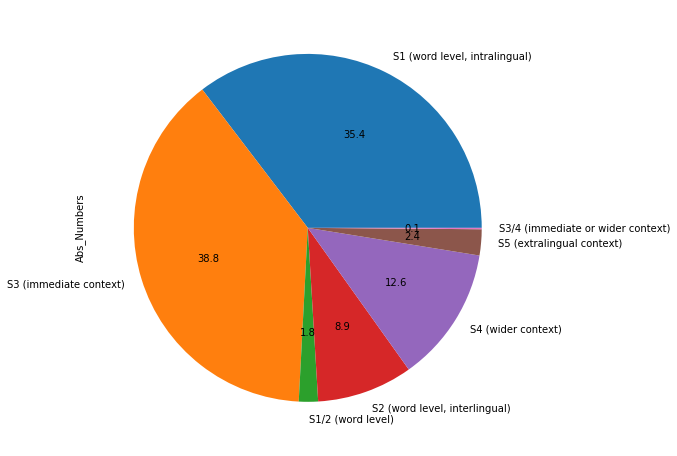

In [24]:
df_Stratgr(data2).plot(kind = 'pie', subplots=True, figsize = (8,8), autopct='%.1f', legend=None);

#### Individual results
##### Student 1

In [25]:
data2[data2['TN']=='TN1'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
0,S1-6 (word formation rules),27,24.55
1,S3 (immediate context),17,15.45
2,S1-7 (partial meaning of complex words),14,12.73
3,S3-12 (semantic relations),12,10.91
4,S3-11 (syntactic relations),9,8.18
5,S1/2-4 (sound),5,4.55
6,S2-1 (L1 - Spanish),4,3.64
7,S4-20 (world knowledge),4,3.64
8,S2-2 (L2 - English),2,1.82
9,S3-10 (word order),2,1.82


In [26]:
df_Stratgr(data2[data2['TN']=='TN1'])

,Abs_Numbers
"S1 (word level, intralingual)",46
S3 (immediate context),41
S1/2 (word level),7
"S2 (word level, interlingual)",7
S4 (wider context),8
S5 (extralingual context),1


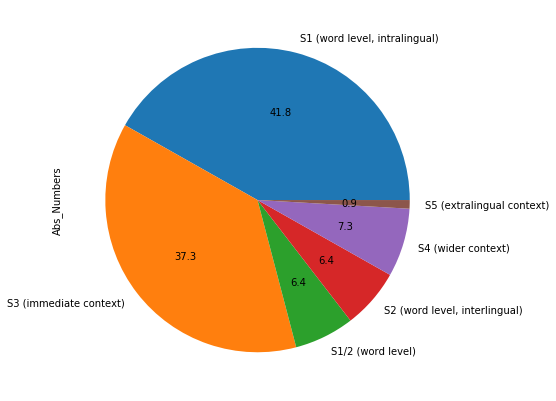

In [27]:
df_Stratgr(data2[data2['TN']=='TN1']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

(Student 2's strategy use could not be analysed due to problems with the think-aloud technique.)
##### Student 3

In [28]:
data2[data2['TN']=='TN3'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
20,S3-11 (syntactic relations),20,14.39
21,S3-12 (semantic relations),20,14.39
22,S1-6 (word formation rules),19,13.67
23,S3 (immediate context),13,9.35
24,S1-7 (partial meaning of complex words),12,8.63
25,S2-1 (L1 - Spanish),9,6.47
26,S4-18 (thematic knowledge),8,5.76
27,S4-20 (world knowledge),5,3.60
28,S2-2 (L2 - English),5,3.60
29,S5-23 (numbers and symbols),4,2.88


In [29]:
df_Stratgr(data2[data2['TN']=='TN3'])

,Abs_Numbers
S3 (immediate context),58
"S1 (word level, intralingual)",42
"S2 (word level, interlingual)",14
S4 (wider context),19
S5 (extralingual context),5
S1/2 (word level),1


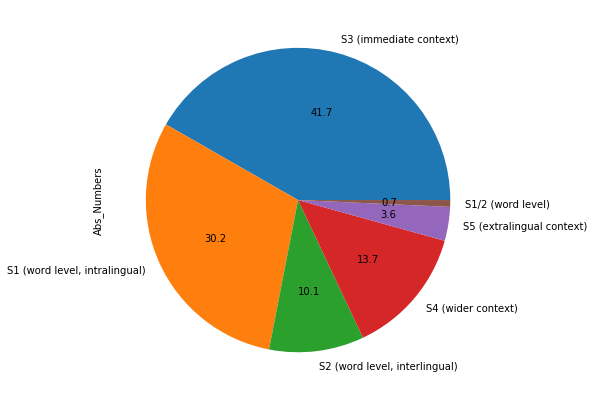

In [30]:
df_Stratgr(data2[data2['TN']=='TN3']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

##### Student 4

In [31]:
data2[data2['TN']=='TN4'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
43,S1-6 (word formation rules),15,18.75
44,S1-9 (orthography),13,16.25
45,S3-11 (syntactic relations),8,10.00
46,S1-7 (partial meaning of complex words),7,8.75
47,S3-12 (semantic relations),6,7.50
48,S2-2 (L2 - English),4,5.00
49,S3 (immediate context),4,5.00
50,S3-10 (word order),3,3.75
51,S4-20 (world knowledge),3,3.75
52,S4-18 (thematic knowledge),3,3.75


In [32]:
df_Stratgr(data2[data2['TN']=='TN4'])

,Abs_Numbers
"S1 (word level, intralingual)",40
S3 (immediate context),21
"S2 (word level, interlingual)",9
S4 (wider context),8
S1/2 (word level),1
S5 (extralingual context),1


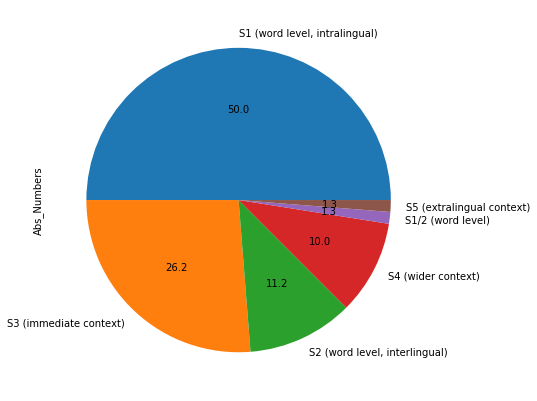

In [33]:
df_Stratgr(data2[data2['TN']=='TN4']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

##### Student 5

In [34]:
data2[data2['TN']=='TN5'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
61,S1-6 (word formation rules),39,22.03
62,S3-11 (syntactic relations),28,15.82
63,S2-2 (L2 - English),16,9.04
64,S3-12 (semantic relations),16,9.04
65,S1-7 (partial meaning of complex words),14,7.91
66,S3 (immediate context),12,6.78
67,S3-10 (word order),7,3.95
68,S1-9 (orthography),7,3.95
69,S1-8 (inflectional morphology),6,3.39
70,S4-14 (rules and elements of text cohesion),5,2.82


In [35]:
df_Stratgr(data2[data2['TN']=='TN5'])

,Abs_Numbers
"S1 (word level, intralingual)",72
S3 (immediate context),65
"S2 (word level, interlingual)",20
S4 (wider context),13
S5 (extralingual context),4
S1/2 (word level),3


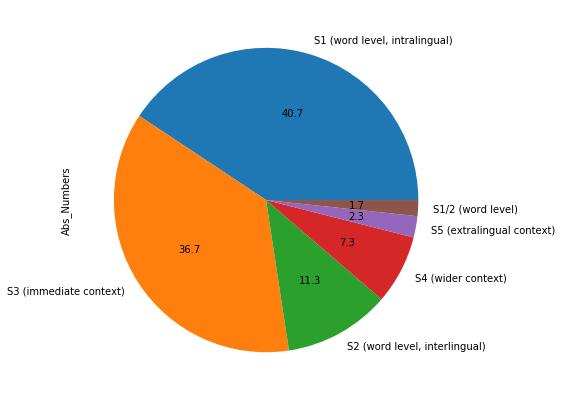

In [36]:
df_Stratgr(data2[data2['TN']=='TN5']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

##### Student 6

In [37]:
data2[data2['TN']=='TN6'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
85,S1-6 (word formation rules),10,21.28
86,S3 (immediate context),7,14.89
87,S3-11 (syntactic relations),6,12.77
88,S1-7 (partial meaning of complex words),6,12.77
89,S3-12 (semantic relations),5,10.64
90,S2-2 (L2 - English),2,4.26
91,S4-20 (world knowledge),2,4.26
92,S3-9 (orthography),2,4.26
93,S4-13 (paradigmatic relations),1,2.13
94,S5-22 (pictures),1,2.13


In [38]:
df_Stratgr(data2[data2['TN']=='TN6'])

,Abs_Numbers
"S1 (word level, intralingual)",17
S3 (immediate context),21
"S2 (word level, interlingual)",3
S4 (wider context),4
S5 (extralingual context),2


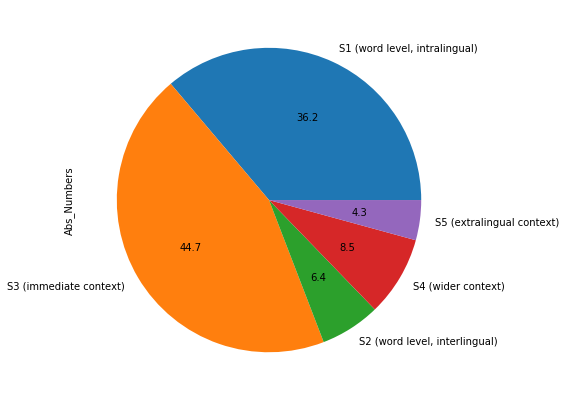

In [39]:
df_Stratgr(data2[data2['TN']=='TN6']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

##### Student 7

In [40]:
data2[data2['TN']=='TN7'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
100,S3-12 (semantic relations),15,14.02
101,S3-11 (syntactic relations),14,13.08
102,S1-6 (word formation rules),13,12.15
103,S3 (immediate context),11,10.28
104,S4-18 (thematic knowledge),8,7.48
105,S1-7 (partial meaning of complex words),8,7.48
106,S4-20 (world knowledge),5,4.67
107,S2-2 (L2 - English),5,4.67
108,S2-1 (L1 - Spanish),4,3.74
109,S4-14 (rules and elements of text cohesion),3,2.80


In [41]:
df_Stratgr(data2[data2['TN']=='TN7'])

,Abs_Numbers
S3 (immediate context),45
"S1 (word level, intralingual)",25
S4 (wider context),22
"S2 (word level, interlingual)",11
S1/2 (word level),2
S5 (extralingual context),2


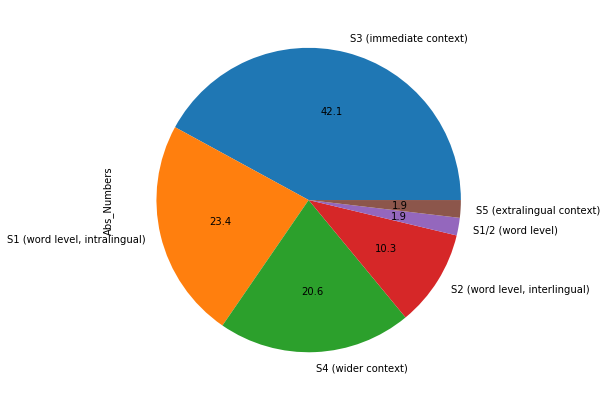

In [42]:
df_Stratgr(data2[data2['TN']=='TN7']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

##### Student 8

In [43]:
data2[data2['TN']=='TN8'][['Codes','Abs_Numbers','Percentage']]

,Codes,Abs_Numbers,Percentage
123,S1-6 (word formation rules),22,17.46
124,S3-12 (semantic relations),20,15.87
125,S3-11 (syntactic relations),20,15.87
126,S1-7 (partial meaning of complex words),13,10.32
127,S4-18 (thematic knowledge),12,9.52
128,S3 (immediate context),9,7.14
129,S4-20 (world knowledge),7,5.56
130,S2-1 (L1 - Spanish),5,3.97
131,S3-10 (word order),3,2.38
132,S4-14 (rules and elements of text cohesion),3,2.38


In [44]:
df_Stratgr(data2[data2['TN']=='TN8'])

,Abs_Numbers
"S1 (word level, intralingual)",36
S3 (immediate context),54
S4 (wider context),25
"S2 (word level, interlingual)",6
S5 (extralingual context),4
S3/4 (immediate or wider context),1


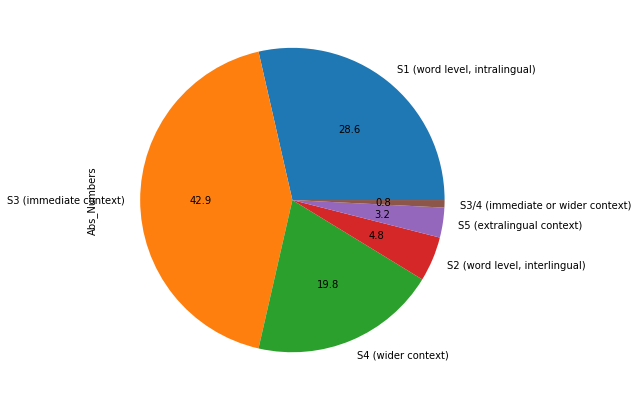

In [45]:
df_Stratgr(data2[data2['TN']=='TN8']).plot(kind = 'pie', subplots=True, figsize = (7,7), autopct='%.1f', legend=None);

### Detailed analysis of the strategy use related to the same nine words  

The analysis is based on the segments coded with the specific codes in MAXQDA.

#### Group results

In [46]:
len(data['Codes'].unique())

24

In [47]:
data['Codes'].value_counts()

S1-6 (word formation rules)                    51
S3-11 (syntactic relations)                    39
S3 (immediate context)                         30
S3-12 (semantic relations)                     29
S1-7 (partial meaning of complex words)        25
S4-18 (thematic knowledge)                     11
S2-2 (L2 - English)                            11
S4-20 (world knowledge)                         9
S1-9 (orthography)                              8
S4-13 (paradigmatic relations)                  7
S3-10 (word order)                              6
S2-1 (L1 - Spanish)                             5
S1/2 (word level)                               4
S3-9 (orthography)                              4
S1-x (exclusion principle)                      3
S3-x (phraseologisms)                           3
S2-3 (L2 - others)                              3
S5-22 (pictures)                                2
S3/4 (immediate or wider context )              2
S4-19 (cultural knowledge)                      1


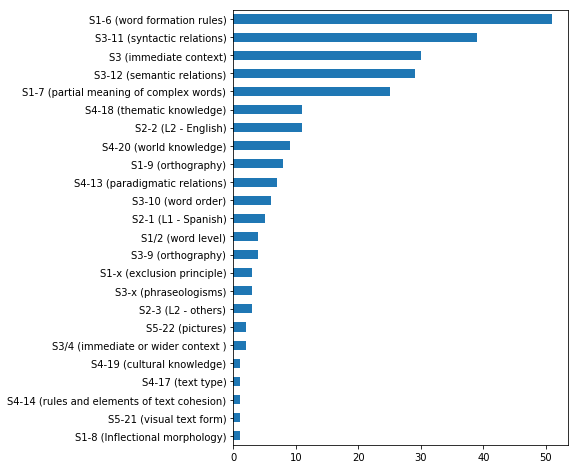

In [48]:
data['Codes'].value_counts(ascending = True).plot(kind = 'barh', figsize = (6,8));

In [49]:
data['Str_gr'].value_counts()

S3 (immediate context)               111
S1 (word level, intralingual)         88
S4 (wider context)                    30
S2 (word level, interlingual)         19
S1/2 (word level)                      4
S5 (extralingual context)              3
S3/4 (immediate or wider context)      2
Name: Str_gr, dtype: int64

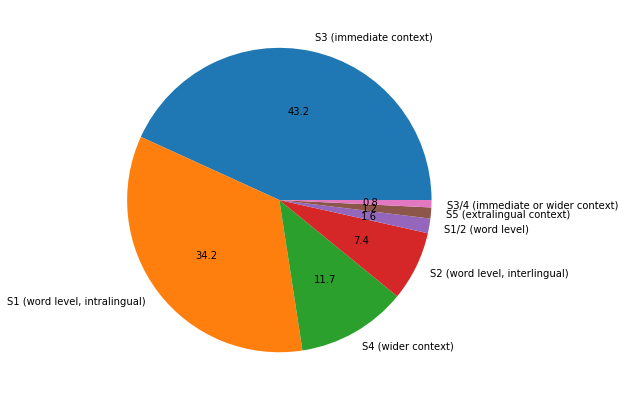

In [50]:
graf_pie(data,'Str_gr')

To control for repeated use of the same inferencing strategy for the same word, the strategy use without counting duplicates is calculated. 

In [51]:
data1['Codes'].value_counts()

S1-6 (word formation rules)                    36
S3-11 (syntactic relations)                    31
S3-12 (semantic relations)                     24
S3 (immediate context)                         21
S1-7 (partial meaning of complex words)        18
S4-18 (thematic knowledge)                     10
S2-2 (L2 - English)                            10
S4-20 (world knowledge)                         9
S1-9 (orthography)                              8
S3-10 (word order)                              6
S2-1 (L1 - Spanish)                             5
S4-13 (paradigmatic relations)                  5
S3-9 (orthography)                              4
S1-x (exclusion principle)                      3
S2-3 (L2 - others)                              3
S1/2 (word level)                               3
S5-22 (pictures)                                2
S3/4 (immediate or wider context )              2
S4-19 (cultural knowledge)                      1
S4-14 (rules and elements of text cohesion)     1


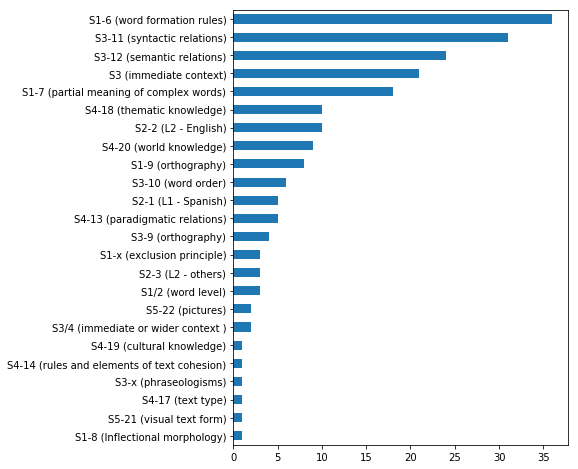

In [52]:
data1['Codes'].value_counts(ascending = True).plot(kind = 'barh', figsize = (6,8));

In [53]:
data1['Str_gr'].value_counts()

S3 (immediate context)               87
S1 (word level, intralingual)        66
S4 (wider context)                   27
S2 (word level, interlingual)        18
S5 (extralingual context)             3
S1/2 (word level)                     3
S3/4 (immediate or wider context)     2
Name: Str_gr, dtype: int64

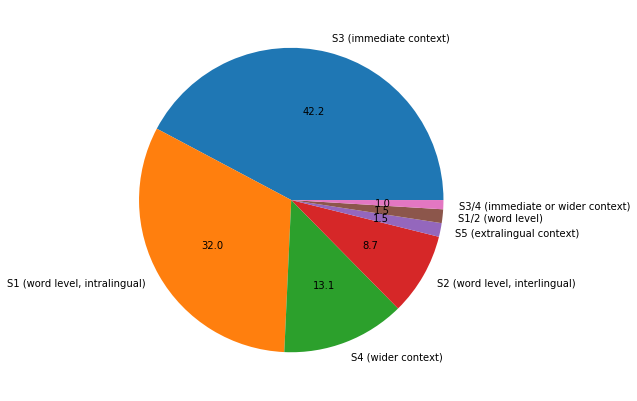

In [54]:
graf_pie(data1,'Str_gr')

The analysis of the two data sets shows no substantial differences. Especially, the rank of strategies and strategy categories no varys. Subsequently, the first data set, including repeated application of the same strategies for the same words, is used for the analysis.

##### Strategy use by words

In [55]:
pd.crosstab(data['Word'], data['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),9,4,12,0,7,3,3,7,6,51
S1-7 (partial meaning of complex words),8,0,10,0,2,0,1,2,2,25
S1-8 (Inflectional morphology),0,1,0,0,0,0,0,0,0,1
S1-9 (orthography),1,0,1,2,1,3,0,0,0,8
S1-x (exclusion principle),0,0,1,0,1,0,0,0,1,3
S1/2 (word level),0,3,0,0,0,0,1,0,0,4
S2-1 (L1 - Spanish),0,1,0,2,0,0,0,0,2,5
S2-2 (L2 - English),1,1,1,0,2,1,0,0,5,11
S2-3 (L2 - others),0,2,0,1,0,0,0,0,0,3


In [56]:
pd.crosstab(data['Word'], data['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",18,5,24,2,11,6,4,9,9,88
S1/2 (word level),0,3,0,0,0,0,1,0,0,4
"S2 (word level, interlingual)",1,4,1,3,2,1,0,0,7,19
S3 (immediate context),12,10,13,15,11,16,13,11,10,111
S3/4 (immediate or wider context),0,1,0,1,0,0,0,0,0,2
S4 (wider context),12,2,1,3,2,2,5,1,2,30
S5 (extralingual context),2,0,0,0,0,0,0,0,1,3
All,45,25,39,24,26,25,23,21,29,257


In [57]:
pd.crosstab(data['Word'], data['Str_gr'], margins = True).T.to_excel('Daten/Words_Strgr_eng.xlsx',encoding='utf-16')

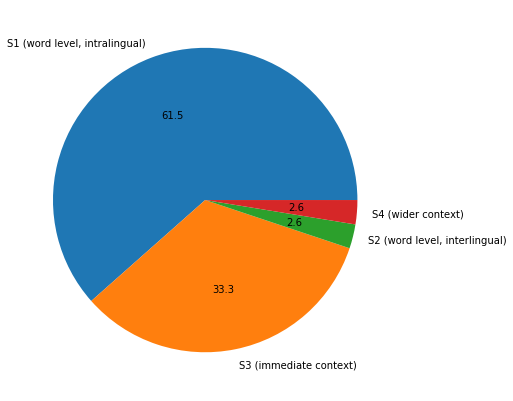

In [58]:
graf_pie(data[data['Word']=='Familienmitgliedern'],'Str_gr')

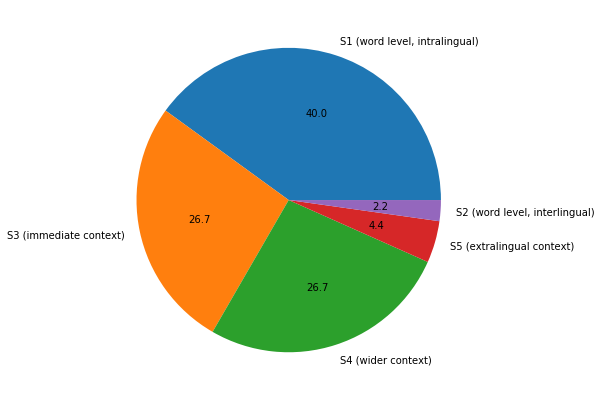

In [59]:
graf_pie(data[data['Word']=='Babynahrung'],'Str_gr')

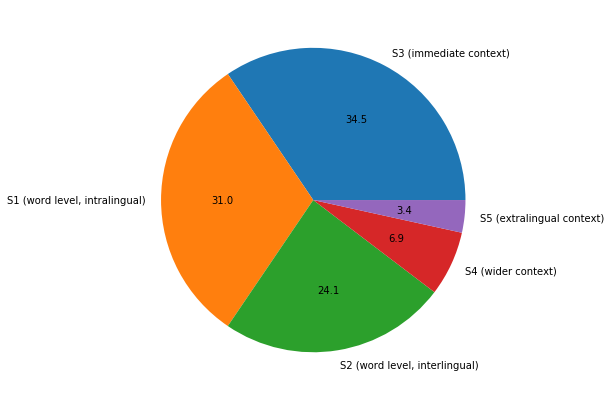

In [60]:
graf_pie(data[data['Word']=='vermarkten'],'Str_gr')

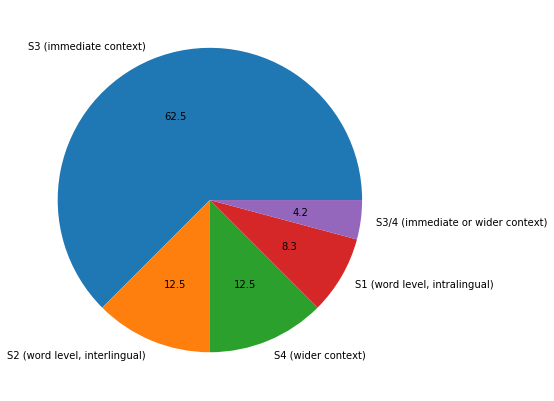

In [61]:
graf_pie(data[data['Word']=='Visier'],'Str_gr')

In [62]:
df1 = pd.DataFrame(data[data['Word']=='Familienmitgliedern']['Str_gr'].value_counts())
df2 = pd.DataFrame(data[data['Word']=='Babynahrung']['Str_gr'].value_counts())
df3 = pd.DataFrame(data[data['Word']=='vermarkten']['Str_gr'].value_counts())
df4 = pd.DataFrame(data[data['Word']=='Visier']['Str_gr'].value_counts())

dfx = df2.join(df1, lsuffix='2', rsuffix='1').fillna(0).astype(integer)
dfy = df3.join(df4, lsuffix='3', rsuffix='4').fillna(0).astype(integer)
df = dfx.join(dfy, lsuffix='x', rsuffix='y')

df = df.sort_values(by='Str_gr1',ascending=False)
df = df.rename(columns={'Str_gr1':'Familienmitgliedern','Str_gr2':'Babynahrung','Str_gr3':'vermarkten','Str_gr4':'Visier'})

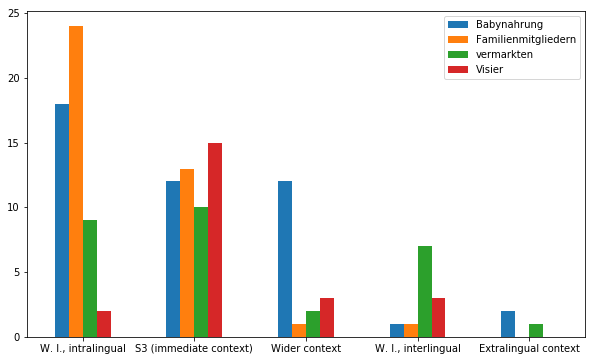

In [63]:
df.rename(index={'S1 (word level, intralingual)':'W. l., intralingual',
                 'S2 (immediate context)':'Immediate context',
                 'S4 (wider context)':'Wider context',
                 'S2 (word level, interlingual)':'W. l., interlingual',
                 'S5 (extralingual context)':'Extralingual context'}).plot(kind='bar', figsize=(10,6))
plt.xticks(rotation='horizontal');

##### Analysis of inferencing success by strategies and words

In [64]:
CTR = pd.crosstab(data1['Codes'], data1['Result'], margins = True)
CTR

Result,0,F,R,T,All
Codes,,,,,
S1-6 (word formation rules),15,3,3,15,36
S1-7 (partial meaning of complex words),4,0,2,12,18
S1-8 (Inflectional morphology),1,0,0,0,1
S1-9 (orthography),5,2,0,1,8
S1-x (exclusion principle),0,1,0,2,3
S1/2 (word level),3,0,0,0,3
S2-1 (L1 - Spanish),1,2,1,1,5
S2-2 (L2 - English),1,3,2,4,10
S2-3 (L2 - others),1,2,0,0,3


In [65]:
CTR1 = CTR.drop(columns='All',index='All')

In [66]:
CTR1.div(CTR1.sum(axis=1), axis=0)

Result,0,F,R,T
Codes,,,,
S1-6 (word formation rules),0.416667,0.083333,0.083333,0.416667
S1-7 (partial meaning of complex words),0.222222,0.000000,0.111111,0.666667
S1-8 (Inflectional morphology),1.000000,0.000000,0.000000,0.000000
S1-9 (orthography),0.625000,0.250000,0.000000,0.125000
S1-x (exclusion principle),0.000000,0.333333,0.000000,0.666667
S1/2 (word level),1.000000,0.000000,0.000000,0.000000
S2-1 (L1 - Spanish),0.200000,0.400000,0.200000,0.200000
S2-2 (L2 - English),0.100000,0.300000,0.200000,0.400000
S2-3 (L2 - others),0.333333,0.666667,0.000000,0.000000


In [67]:
CTR1.div(CTR1.sum(axis=0), axis=1)

Result,0,F,R,T
Codes,,,,
S1-6 (word formation rules),0.227273,0.061224,0.250000,0.189873
S1-7 (partial meaning of complex words),0.060606,0.000000,0.166667,0.151899
S1-8 (Inflectional morphology),0.015152,0.000000,0.000000,0.000000
S1-9 (orthography),0.075758,0.040816,0.000000,0.012658
S1-x (exclusion principle),0.000000,0.020408,0.000000,0.025316
S1/2 (word level),0.045455,0.000000,0.000000,0.000000
S2-1 (L1 - Spanish),0.015152,0.040816,0.083333,0.012658
S2-2 (L2 - English),0.015152,0.061224,0.166667,0.050633
S2-3 (L2 - others),0.015152,0.040816,0.000000,0.000000


In [68]:
pd.crosstab(data1['Word'], data1['Result'], margins = True)

Result,0,F,R,T,All
Word,,,,,
Babynahrung,4,0,0,29,33
Drohungen,16,5,0,0,21
Familienmitgliedern,7,0,2,17,26
Visier,5,16,0,0,21
Werkzeug,9,9,0,5,23
Wirkung,10,8,0,0,18
kassierte,4,11,0,5,20
lauteten,11,0,0,6,17
vermarkten,0,0,10,17,27


#### Individual results

##### Student 1

In [69]:
pd.crosstab(data[data['TN']=='TN1']['Word'], data[data['TN']=='TN1']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),2,2,2,0,1,2,0,1,1,11
S1-7 (partial meaning of complex words),2,0,2,0,0,0,0,1,1,6
S1-8 (Inflectional morphology),0,1,0,0,0,0,0,0,0,1
S1-9 (orthography),0,0,0,1,0,0,0,0,0,1
S2-1 (L1 - Spanish),0,0,0,1,0,0,0,0,0,1
S2-2 (L2 - English),0,0,0,0,0,0,0,0,1,1
S3 (immediate context),0,0,2,1,1,2,0,2,1,9
S3-10 (word order),0,0,0,1,0,0,0,0,0,1
S3-11 (syntactic relations),1,1,0,1,0,0,1,0,0,4


In [70]:
pd.crosstab(data[data['TN']=='TN1']['Word'], data[data['TN']=='TN1']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",4,3,4,1,1,2,0,2,2,19
"S2 (word level, interlingual)",0,0,0,1,0,0,0,0,1,2
S3 (immediate context),3,1,2,4,1,2,2,2,1,18
S4 (wider context),0,0,0,1,0,0,1,0,0,2
All,7,4,6,7,2,4,3,4,4,41


In [71]:
pd.crosstab(data[data['TN']=='TN1']['Word'], data[data['TN']=='TN1']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
0,7,4,0,0,2,4,0,0,0,17
F,0,0,0,7,0,0,0,0,0,7
R,0,0,0,0,0,0,0,0,4,4
T,0,0,6,0,0,0,3,4,0,13
All,7,4,6,7,2,4,3,4,4,41


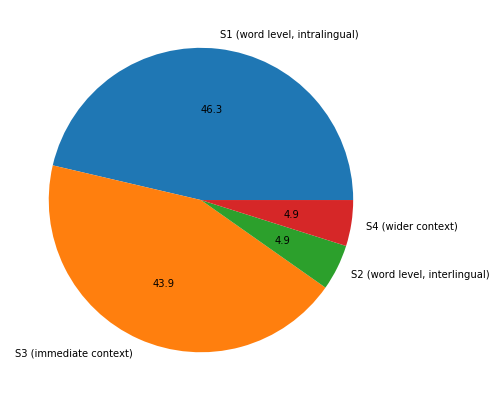

In [72]:
graf_pie(data[data['TN']=='TN1'],'Str_gr')

(Student 2's strategy use could not be analysed due to problems with the think-aloud technique.)
##### Student 3

In [73]:
pd.crosstab(data[data['TN']=='TN3']['Word'], data[data['TN']=='TN3']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),1,0,1,0,1,1,0,1,1,6
S1-7 (partial meaning of complex words),0,0,1,0,1,0,0,0,1,3
S1-9 (orthography),0,0,0,0,0,1,0,0,0,1
S2-1 (L1 - Spanish),0,0,0,0,0,0,0,0,1,1
S3 (immediate context),0,1,0,2,0,0,0,1,0,4
S3-11 (syntactic relations),2,0,2,0,0,2,1,0,1,8
S3-12 (semantic relations),2,0,1,0,0,0,1,0,1,5
S4-13 (paradigmatic relations),2,0,0,0,0,0,0,0,0,2
S4-18 (thematic knowledge),1,0,0,0,0,0,0,0,0,1


In [74]:
pd.crosstab(data[data['TN']=='TN3']['Word'], data[data['TN']=='TN3']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",1,0,2,0,2,2,0,1,2,10
"S2 (word level, interlingual)",0,0,0,0,0,0,0,0,1,1
S3 (immediate context),4,1,3,2,0,2,2,1,2,17
S4 (wider context),4,0,0,0,0,0,1,0,0,5
All,9,1,5,2,2,4,3,2,5,33


In [75]:
pd.crosstab(data[data['TN']=='TN3']['Word'], data[data['TN']=='TN3']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
0,0,1,5,2,2,0,0,2,0,12
F,0,0,0,0,0,4,3,0,0,7
T,9,0,0,0,0,0,0,0,5,14
All,9,1,5,2,2,4,3,2,5,33


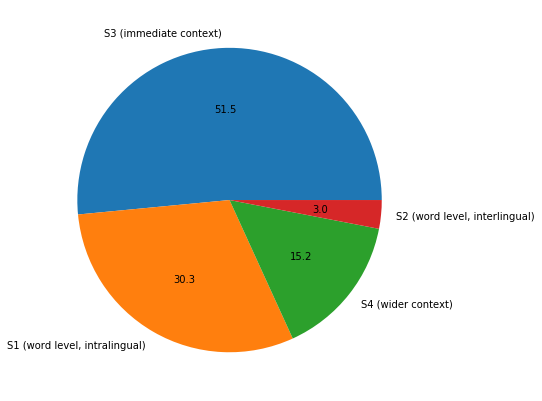

In [76]:
graf_pie(data[data['TN']=='TN3'],'Str_gr')

##### Student 4

In [77]:
pd.crosstab(data[data['TN']=='TN4']['Word'], data[data['TN']=='TN4']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),0,1,0,0,0,0,0,1,1,3
S1-9 (orthography),1,0,1,1,1,1,0,0,0,5
S1-x (exclusion principle),0,0,0,0,0,0,0,0,1,1
S1/2 (word level),0,1,0,0,0,0,1,0,0,2
S2-1 (L1 - Spanish),0,1,0,0,0,0,0,0,0,1
S2-2 (L2 - English),0,1,0,0,0,0,0,0,1,2
S2-3 (L2 - others),0,1,0,0,0,0,0,0,0,1
S3 (immediate context),0,1,0,0,1,0,0,0,0,2
S3-10 (word order),0,0,0,0,0,0,0,1,0,1


In [78]:
pd.crosstab(data[data['TN']=='TN4']['Word'], data[data['TN']=='TN4']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",1,1,1,1,1,1,0,1,2,9
S1/2 (word level),0,1,0,0,0,0,1,0,0,2
"S2 (word level, interlingual)",0,3,0,0,0,0,0,0,1,4
S3 (immediate context),1,1,2,0,1,0,0,2,2,9
S4 (wider context),3,0,0,0,0,0,0,0,0,3
All,5,6,3,1,2,1,1,3,5,27


In [79]:
pd.crosstab(data[data['TN']=='TN4']['Word'], data[data['TN']=='TN4']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
0,0,6,3,1,2,1,1,3,0,17
T,5,0,0,0,0,0,0,0,5,10
All,5,6,3,1,2,1,1,3,5,27


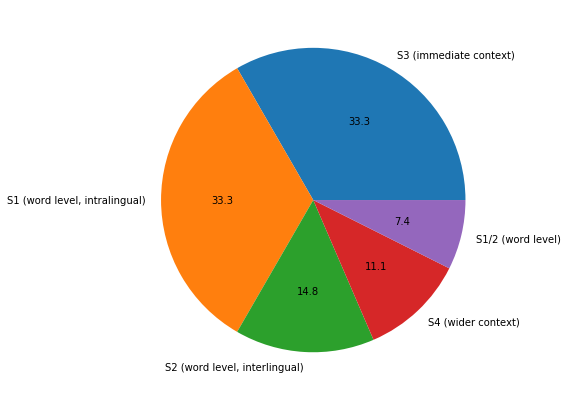

In [80]:
graf_pie(data[data['TN']=='TN4'],'Str_gr')

##### Student 5

In [81]:
pd.crosstab(data[data['TN']=='TN5']['Word'], data[data['TN']=='TN5']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),2,0,2,0,1,0,1,2,2,10
S1-7 (partial meaning of complex words),2,0,2,0,0,0,0,0,0,4
S1-x (exclusion principle),0,0,1,0,0,0,0,0,0,1
S1/2 (word level),0,2,0,0,0,0,0,0,0,2
S2-2 (L2 - English),0,0,1,0,1,0,0,0,2,4
S3 (immediate context),0,0,0,2,0,0,1,2,0,5
S3-10 (word order),0,0,0,0,0,1,0,0,1,2
S3-11 (syntactic relations),0,0,1,0,1,2,2,1,1,8
S3-12 (semantic relations),0,0,1,0,1,0,0,0,1,3


In [82]:
pd.crosstab(data[data['TN']=='TN5']['Word'], data[data['TN']=='TN5']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",4,0,5,0,1,0,1,2,2,15
S1/2 (word level),0,2,0,0,0,0,0,0,0,2
"S2 (word level, interlingual)",0,0,1,0,1,0,0,0,2,4
S3 (immediate context),0,0,2,2,2,4,3,3,3,19
S4 (wider context),0,0,1,0,1,0,0,0,1,3
S5 (extralingual context),0,0,0,0,0,0,0,0,1,1
All,4,2,9,2,5,4,4,5,9,44


In [83]:
pd.crosstab(data[data['TN']=='TN5']['Word'], data[data['TN']=='TN5']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
0,0,2,0,2,0,4,4,5,0,17
F,0,0,0,0,5,0,0,0,0,5
T,4,0,9,0,0,0,0,0,9,22
All,4,2,9,2,5,4,4,5,9,44


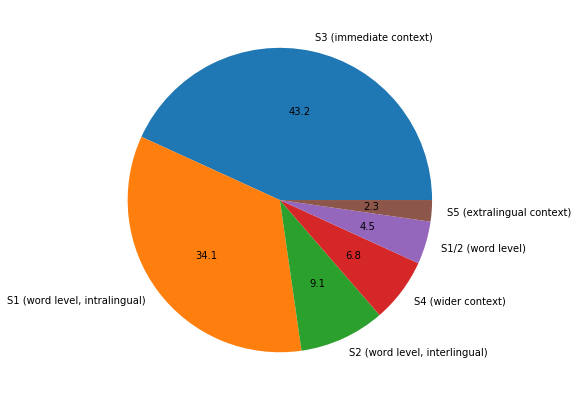

In [84]:
graf_pie(data[data['TN']=='TN5'],'Str_gr')

##### Student 6

In the case of student 6, no segment could be coded with a specific strategy code for the word "vermarkten". But as the student confirmed in the post-task interview that she had searched for this word's meaning, it was included in the detailed analysis.

In [85]:
pd.crosstab(data[data['TN']=='TN6']['Word'], data[data['TN']=='TN6']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,All
Codes,,,,,,,,,
S1-6 (word formation rules),1,0,4,0,2,0,1,1,9
S1-7 (partial meaning of complex words),2,0,2,0,0,0,1,0,5
S1-9 (orthography),0,0,0,0,0,1,0,0,1
S2-2 (L2 - English),1,0,0,0,0,0,0,0,1
S3 (immediate context),2,0,0,1,2,0,0,0,5
S3-10 (word order),0,0,0,0,0,1,0,0,1
S3-11 (syntactic relations),0,1,0,0,0,1,0,0,2
S3-12 (semantic relations),0,1,0,0,0,1,0,0,2
S3-9 (orthography),0,1,0,0,1,0,0,0,2


In [86]:
pd.crosstab(data[data['TN']=='TN6']['Word'], data[data['TN']=='TN6']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,All
Str_gr,,,,,,,,,
"S1 (word level, intralingual)",3,0,6,0,2,1,2,1,15
"S2 (word level, interlingual)",1,0,0,0,0,0,0,0,1
S3 (immediate context),2,3,0,1,3,3,0,0,12
S3/4 (immediate or wider context),0,0,0,1,0,0,0,0,1
S4 (wider context),2,0,0,0,0,0,0,0,2
S5 (extralingual context),1,0,0,0,0,0,0,0,1
All,9,3,6,2,5,4,2,1,32


In [87]:
pd.crosstab(data[data['TN']=='TN6']['Word'], data[data['TN']=='TN6']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,All
Result,,,,,,,,,
0,0,3,0,2,5,4,0,1,15
R,0,0,6,0,0,0,0,0,6
T,9,0,0,0,0,0,2,0,11
All,9,3,6,2,5,4,2,1,32


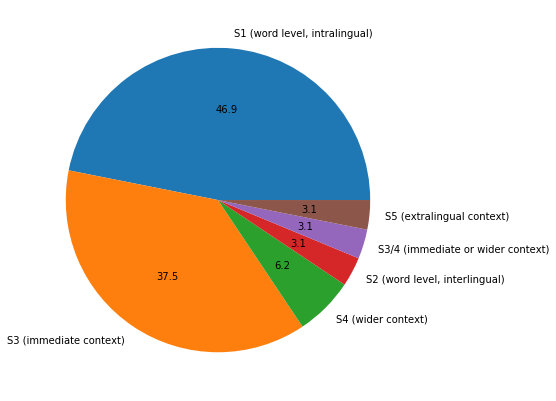

In [88]:
graf_pie(data[data['TN']=='TN6'],'Str_gr')

##### Student 7

In [89]:
pd.crosstab(data[data['TN']=='TN7']['Word'], data[data['TN']=='TN7']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),1,0,1,0,0,0,1,0,0,3
S1-7 (partial meaning of complex words),1,0,1,0,0,0,0,0,0,2
S1-x (exclusion principle),0,0,0,0,1,0,0,0,0,1
S2-1 (L1 - Spanish),0,0,0,1,0,0,0,0,1,2
S2-2 (L2 - English),0,0,0,0,1,1,0,0,1,3
S2-3 (L2 - others),0,1,0,1,0,0,0,0,0,2
S3 (immediate context),0,0,1,2,0,1,0,0,0,4
S3-11 (syntactic relations),0,1,0,0,1,0,2,1,0,5
S3-12 (semantic relations),1,0,0,0,0,0,2,2,0,5


In [90]:
pd.crosstab(data[data['TN']=='TN7']['Word'], data[data['TN']=='TN7']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",2,0,2,0,1,0,1,0,0,6
"S2 (word level, interlingual)",0,1,0,2,1,1,0,0,2,7
S3 (immediate context),1,4,1,2,2,1,4,3,0,18
S4 (wider context),2,2,0,0,0,0,2,1,0,7
All,5,7,3,4,4,2,7,4,2,38


In [91]:
pd.crosstab(data[data['TN']=='TN7']['Word'], data[data['TN']=='TN7']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
F,0,7,0,4,4,2,7,0,0,24
R,0,0,0,0,0,0,0,0,2,2
T,5,0,3,0,0,0,0,4,0,12
All,5,7,3,4,4,2,7,4,2,38


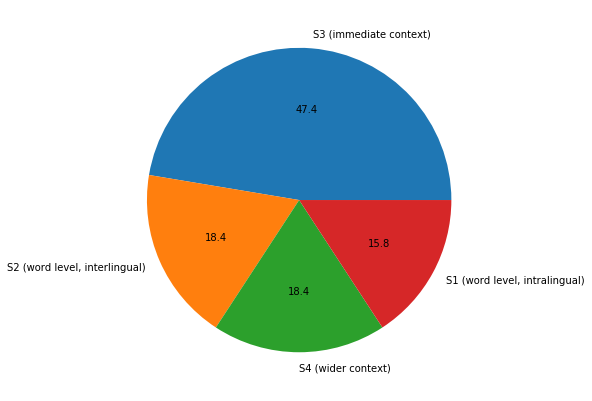

In [92]:
graf_pie(data[data['TN']=='TN7'],'Str_gr')

##### Student 8

In [93]:
pd.crosstab(data[data['TN']=='TN8']['Word'], data[data['TN']=='TN8']['Codes'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Codes,,,,,,,,,,
S1-6 (word formation rules),2,1,2,0,2,0,0,1,1,9
S1-7 (partial meaning of complex words),1,0,2,0,1,0,0,1,0,5
S3 (immediate context),0,0,0,1,0,0,0,0,0,1
S3-10 (word order),0,0,0,1,0,0,0,0,0,1
S3-11 (syntactic relations),1,0,2,1,1,2,1,0,1,9
S3-12 (semantic relations),0,0,1,1,1,2,1,0,1,7
S3/4 (immediate or wider context ),0,1,0,0,0,0,0,0,0,1
S4-13 (paradigmatic relations),1,0,0,0,0,0,0,0,0,1
S4-14 (rules and elements of text cohesion),0,0,0,1,0,0,0,0,0,1


In [94]:
pd.crosstab(data[data['TN']=='TN8']['Word'], data[data['TN']=='TN8']['Str_gr'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Str_gr,,,,,,,,,,
"S1 (word level, intralingual)",3,1,4,0,3,0,0,2,1,14
S3 (immediate context),1,0,3,4,2,4,2,0,2,18
S3/4 (immediate or wider context),0,1,0,0,0,0,0,0,0,1
S4 (wider context),1,0,0,2,1,2,1,0,1,8
S5 (extralingual context),1,0,0,0,0,0,0,0,0,1
All,6,2,7,6,6,6,3,2,4,42


In [95]:
pd.crosstab(data[data['TN']=='TN8']['Word'], data[data['TN']=='TN8']['Result'], margins = True).T

Word,Babynahrung,Drohungen,Familienmitgliedern,Visier,Werkzeug,Wirkung,kassierte,lauteten,vermarkten,All
Result,,,,,,,,,,
0,0,2,0,0,0,0,0,2,0,4
F,0,0,0,6,0,6,3,0,0,15
R,0,0,0,0,0,0,0,0,4,4
T,6,0,7,0,6,0,0,0,0,19
All,6,2,7,6,6,6,3,2,4,42


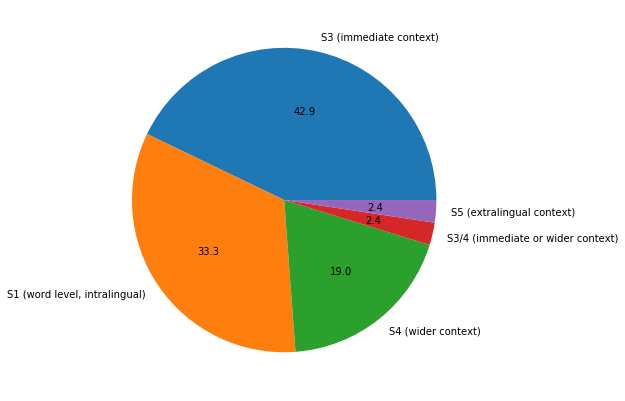

In [96]:
graf_pie(data[data['TN']=='TN8'],'Str_gr')

##### Summary of individual strategy use

In [97]:
pd.crosstab(data['TN'], data['Codes'], margins = True).T

TN,TN1,TN3,TN4,TN5,TN6,TN7,TN8,All
Codes,,,,,,,,
S1-6 (word formation rules),11,6,3,10,9,3,9,51
S1-7 (partial meaning of complex words),6,3,0,4,5,2,5,25
S1-8 (Inflectional morphology),1,0,0,0,0,0,0,1
S1-9 (orthography),1,1,5,0,1,0,0,8
S1-x (exclusion principle),0,0,1,1,0,1,0,3
S1/2 (word level),0,0,2,2,0,0,0,4
S2-1 (L1 - Spanish),1,1,1,0,0,2,0,5
S2-2 (L2 - English),1,0,2,4,1,3,0,11
S2-3 (L2 - others),0,0,1,0,0,2,0,3


In [98]:
pd.crosstab(data['TN'], data['Codes'], margins = True).T.to_excel('Daten/TN_Codes_eng.xlsx',encoding='utf-16')

In [99]:
pd.crosstab(data['TN'], data['Str_gr'], margins = True).T

TN,TN1,TN3,TN4,TN5,TN6,TN7,TN8,All
Str_gr,,,,,,,,
"S1 (word level, intralingual)",19,10,9,15,15,6,14,88
S1/2 (word level),0,0,2,2,0,0,0,4
"S2 (word level, interlingual)",2,1,4,4,1,7,0,19
S3 (immediate context),18,17,9,19,12,18,18,111
S3/4 (immediate or wider context),0,0,0,0,1,0,1,2
S4 (wider context),2,5,3,3,2,7,8,30
S5 (extralingual context),0,0,0,1,1,0,1,3
All,41,33,27,44,32,38,42,257


In [100]:
pd.crosstab(data['TN'], data['Str_gr'], margins = True).T.to_excel('Daten/TN_Strgr_eng.xlsx',encoding='utf-16')